In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from yellowbrick.regressor import ResidualsPlot

X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
Y_train = pd.read_csv('../data/Y_train.csv')
Y_test = pd.read_csv('../data/Y_test.csv')

FS_DT = pd.read_csv('../data/FS_decision_tree.csv').values.flatten()
FS_RF = pd.read_csv('../data/FS_random_forest.csv').values.flatten()

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2341, 142), (586, 142), (2341, 1), (586, 1))

# Linear regression

In [10]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
test_pre = lr.predict(X_test)
train_pre = lr.predict(X_train)

print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                       y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                      y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                                       y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                                      y_pred=np.exp(test_pre)))))

Train MSE: 418248634.460
Test MSE: 450414235.010
Train R^2: 0.930
Test R^2: 0.944


Text(0, 0.5, 'Sale_Price')

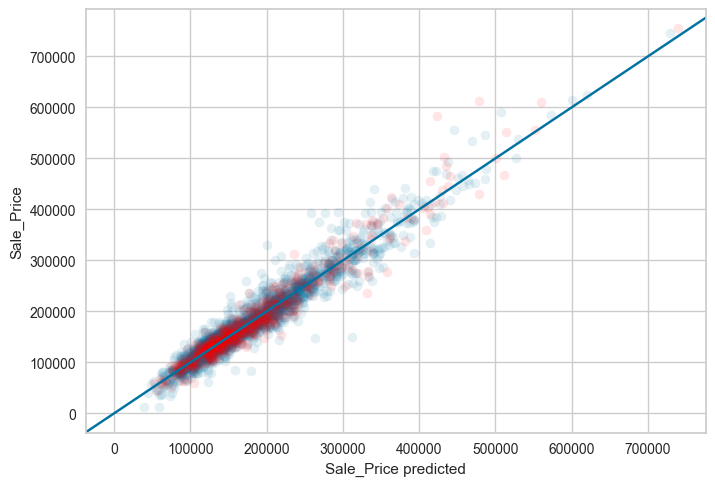

In [11]:
fig, axs = plt.subplots()

axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')

# Residuals

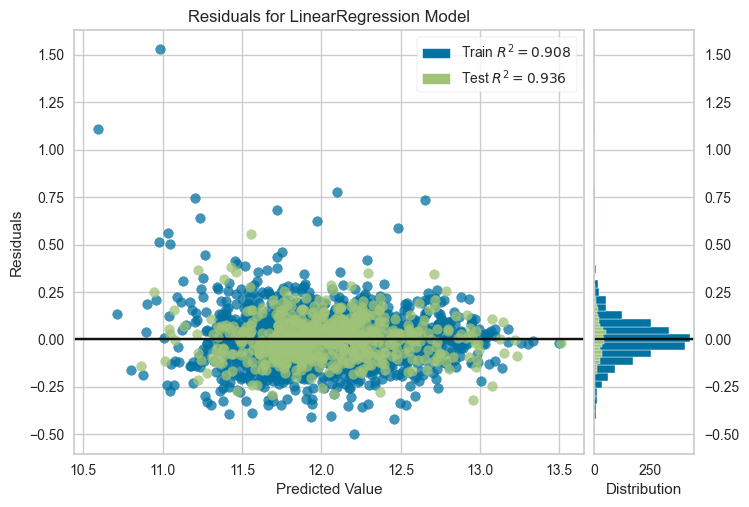

<AxesSubplot: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [12]:
lr = LinearRegression()
vis = ResidualsPlot(lr)
vis.fit(X_train, Y_train)
vis.score(X_test, Y_test)
vis.show()

# Polynomial lr

In [13]:
# make pipeline: create features, then feed them to linear_reg model
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, Y_train)

test_pre = model.predict(X_test)
train_pre = model.predict(X_train)

print("Train Error degree {:d}: {:.3f}".format(degree, (mean_squared_error(y_true=np.exp(Y_train),
                                                                           y_pred=np.exp(train_pre)))))

print("Test Error degree {:d}: {:.3f}".format(degree, (mean_squared_error(y_true=np.exp(Y_test),
                                                                          y_pred=np.exp(test_pre)))))

Train Error degree 2: 0.390
Test Error degree 2: 165287024890325283208394502672891766022064170818081871301333463233147700770342171496513192576718937904589296891043511256459694859920673973585912194452148530668550470834170718075274676244167054020853432425170507932669906367021056.000


overfitting!

# Kfold

In [14]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

lr = LinearRegression()
train_pre = cross_val_predict(lr, X_train, Y_train, cv=kf)
test_pre = cross_val_predict(lr, X_test, Y_test, cv=kf)

print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                       y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                      y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Train MSE: 498646293.972
Test MSE: 498165696.363
Train R^2: 0.916
Test R^2: 0.938


Text(0, 0.5, 'Sale_Price')

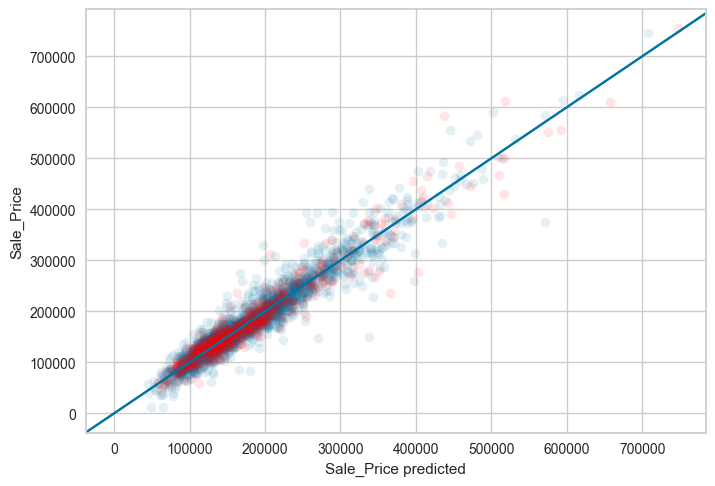

In [15]:
fig, axs = plt.subplots()

axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')

In [16]:
lr = LinearRegression()
bagged_lr = BaggingRegressor(lr, n_estimators=100)
bagged_lr.fit(X_train, Y_train.values.ravel())
test_pre = bagged_lr.predict(X_test)
train_pre = bagged_lr.predict(X_train)

print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Train MSE: 418129217.397
Test MSE: 450018967.646
Train R^2: 0.930
Test R^2: 0.944


# Bagging

## proviamo a ridurre le feature

In [17]:
lr = LinearRegression()
bagged_lr = BaggingRegressor(lr, n_estimators=100)
bagged_lr.fit(X_train[FS_DT], Y_train.values.ravel())
test_pre = bagged_lr.predict(X_test[FS_DT])
train_pre = bagged_lr.predict(X_train[FS_DT])

print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Train MSE: 423609398.732
Test MSE: 451763207.885
Train R^2: 0.929
Test R^2: 0.944


In [18]:
lr = LinearRegression()
bagged_lr = BaggingRegressor(lr, n_estimators=100)
bagged_lr.fit(X_train[FS_RF], Y_train.values.ravel())
test_pre = bagged_lr.predict(X_test[FS_RF])
train_pre = bagged_lr.predict(X_train[FS_RF])

print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Train MSE: 447017877.591
Test MSE: 466615631.592
Train R^2: 0.925
Test R^2: 0.942
